# Analysis of THEMATRIX.csv

In [28]:
import seaborn as sbn
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
MATRIX = pd.read_csv(r"C:\Users\sternheimam\Desktop\my-notebook\THEMATRIX.csv",delimiter=";")
BASIX = pd.read_csv(r"C:\Users\sternheimam\Desktop\my-notebook\THEBASIX.csv",delimiter=";")

In [5]:
BASIX.head()

,Included features,Churn in 1 months,Churn in 2 months,Churn in 3 months
0,"((3, 11),)","{'AUC_scores': [0.5321478074596775, 0.56435129...","{'AUC_scores': [0.5220383190327613, 0.52035786...","{'AUC_scores': [0.5402768653448001, 0.54397249..."
1,"((13, 14),)","{'AUC_scores': [0.5561160151324085, 0.57469291...","{'AUC_scores': [0.5621007149336272, 0.55678953...","{'AUC_scores': [0.581434046153591, 0.552024713..."
2,"((6, 7),)","{'AUC_scores': [0.4902900378310214, 0.49619675...","{'AUC_scores': [0.5211463414634147, 0.51499861...","{'AUC_scores': [0.515591263616901, 0.504231959..."
3,"((9, 10, 12),)","{'AUC_scores': [0.605892184223389, 0.594301285...","{'AUC_scores': [0.5675485937431443, 0.54857855...","{'AUC_scores': [0.5582415922947485, 0.55982057..."
4,"((4, 5, 8),)","{'AUC_scores': [0.5106728209329069, 0.49996062...","{'AUC_scores': [0.5090430883746373, 0.52040512...","{'AUC_scores': [0.5106545614413458, 0.52250528..."


In [8]:
MATRIX.head()

,Included features,Churn in 1 months,Churn in 2 months,Churn in 3 months
0,"((3, 11),)","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job..."
1,"((13, 14),)","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job..."
2,"((6, 7),)","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job..."
3,"((9, 10, 12),)","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job..."
4,"((4, 5, 8),)","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job...","{'parameter_settings': {'reg_alpha': 0, 'n_job..."


In [42]:
#Conversion dictionary
D = {(3,11): "I", # inactivity
     (4,5,8): "T", # textual
     (6,7): "O", # opinion
     (13,14): "O_r", # opinion 'back'
     (9,10,12): "T_r"} # textual 'back'

# AUC analyses

## all means and stds for all cells in matrix

xgboost balanced

In [14]:
import os

path_out = r"C:\Users\sternheimam\Dropbox\TNO\Scriptie\6. Report\figures\matrix_analyses"

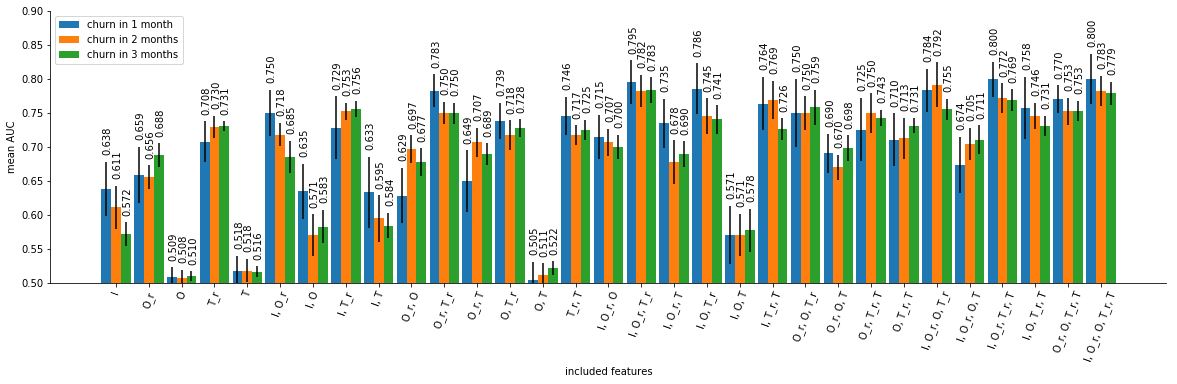

In [43]:
matrix = MATRIX

plt.close()
fig,ax = plt.subplots(figsize=(20,5))
#plt.grid(axis="y")
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.3
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"all_balanced.png"),bbox_inches='tight')
plt.show()

In [44]:
for column in list(matrix.columns):
    if column!= "Included features":
        means = []
        stds = []
        for row in matrix[column]:
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        print column, "%.4f" %np.max(means),means.index(np.max(means)), matrix['Included features'][means.index(np.max(means))]
        print column, "%.4f" %np.mean(means), "%.4f" %np.mean(stds)

Churn in 1 months 0.8000 27 ((3, 11), (13, 14), (9, 10, 12), (4, 5, 8))
Churn in 1 months 0.6985 0.0355
Churn in 2 months 0.7918 25 ((3, 11), (13, 14), (6, 7), (9, 10, 12))
Churn in 2 months 0.6917 0.0228
Churn in 3 months 0.7834 16 ((3, 11), (13, 14), (9, 10, 12))
Churn in 3 months 0.6891 0.0167


linear balanced

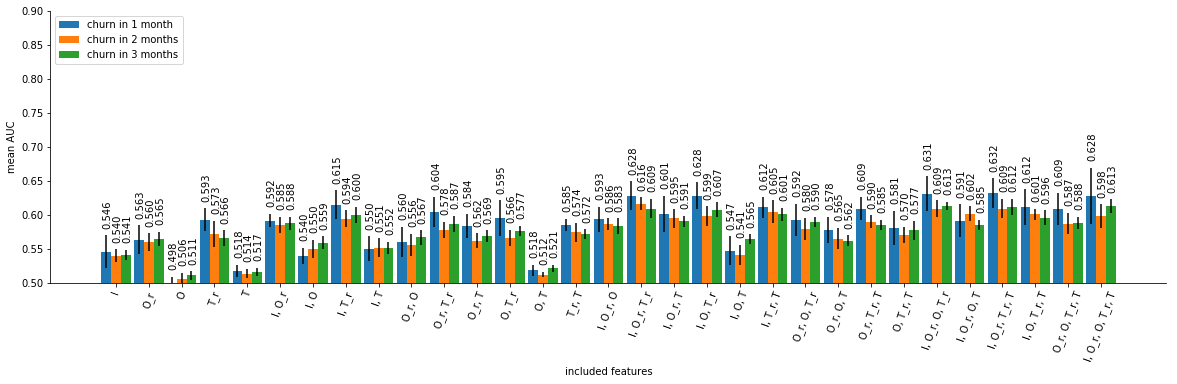

In [15]:
matrix = BASIX

plt.close()
fig,ax = plt.subplots(figsize=(20,5))
#plt.grid(axis="y")
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.3
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"all_linear.png"),bbox_inches='tight')
plt.show()

In [16]:
for column in list(matrix.columns):
    if column!= "Included features":
        means = []
        stds = []
        for row in matrix[column]:
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        print column, "%.4f" %np.max(means),means.index(np.max(means)), matrix['Included features'][means.index(np.max(means))]
        print column, "%.4f" %np.mean(means), "%.4f" %np.mean(stds)

Churn in 1 months 0.6316521945590892 27 ((3, 11), (13, 14), (9, 10, 12), (4, 5, 8))
Churn in 2 months 0.6164711695355605 16 ((3, 11), (13, 14), (9, 10, 12))
Churn in 3 months 0.6132830187879532 25 ((3, 11), (13, 14), (6, 7), (9, 10, 12))


## all means and stds for cells in matrix not resulting from 'static' features

In [17]:
def remove_rows_from_matrix(matrix,feature):
    regex = "[^0-9]"+ str(feature) + "[^0-9]"
    new_matrix = matrix[~matrix['Included features'].str.contains(regex)]
    return new_matrix if len(matrix) == len(new_matrix) else remove_rows_from_matrix(new_matrix,feature)

xgboost balanced

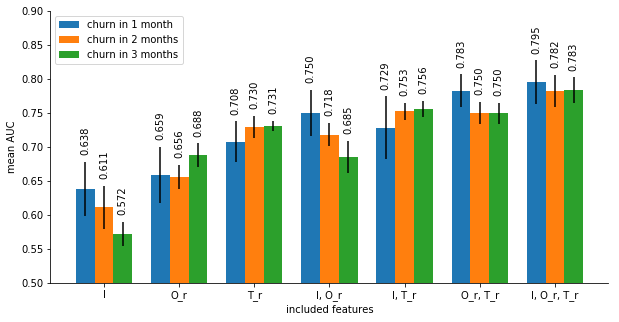

In [18]:
matrix = MATRIX

for x in [4,5,6,7,8]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center", va = "bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"retro_balanced.png"),bbox_inches='tight')
plt.show()

linear balanced

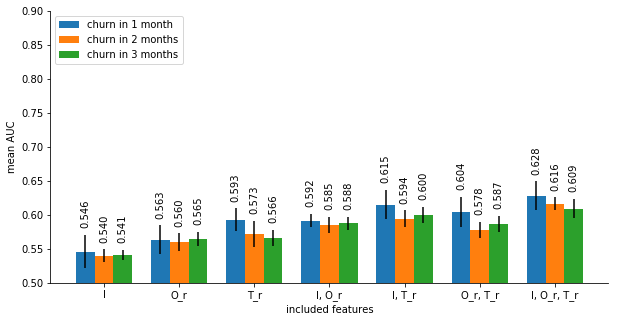

In [19]:
matrix = BASIX

for x in [4,5,6,7,8]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center", va = "bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"retro_linear.png"),bbox_inches='tight')
plt.show()

## the opposite: only from cells resulting from static features

xgboost balanced

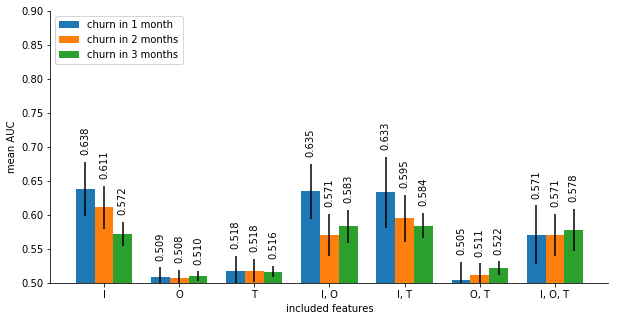

In [20]:
matrix = MATRIX

for x in [9,10,12,13,14]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"static_balanced.png"),bbox_inches='tight')
plt.show()

linear balanced

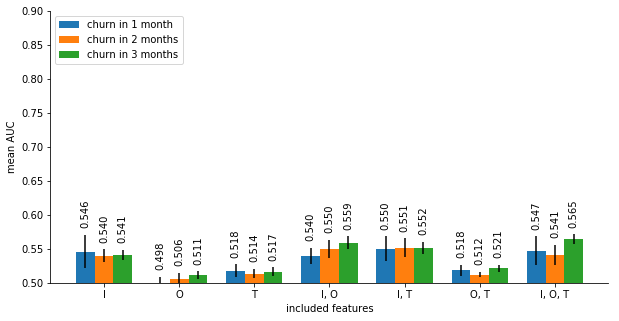

In [21]:
matrix = BASIX

for x in [9,10,12,13,14]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"static_linear.png"),bbox_inches='tight')
plt.show()

## means and stds only for cells in matrix corresponding to some feature

xgboost balanced

C:\Users\sternheimam\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


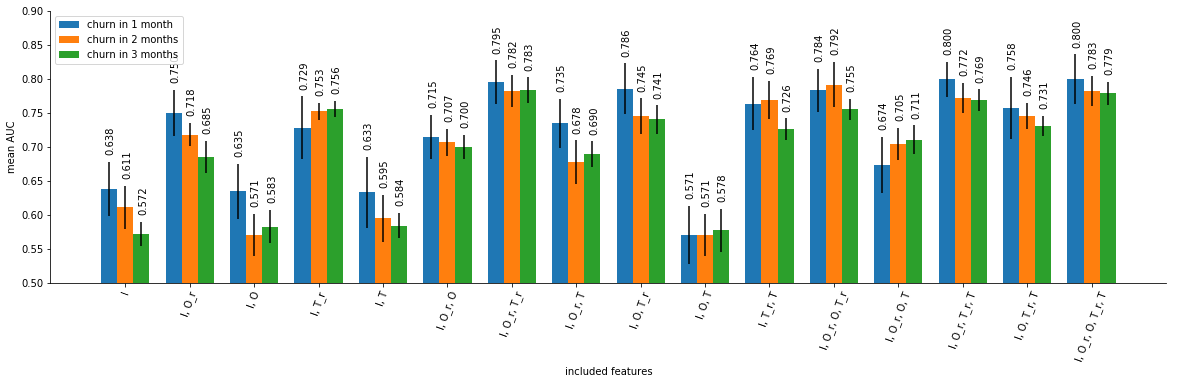

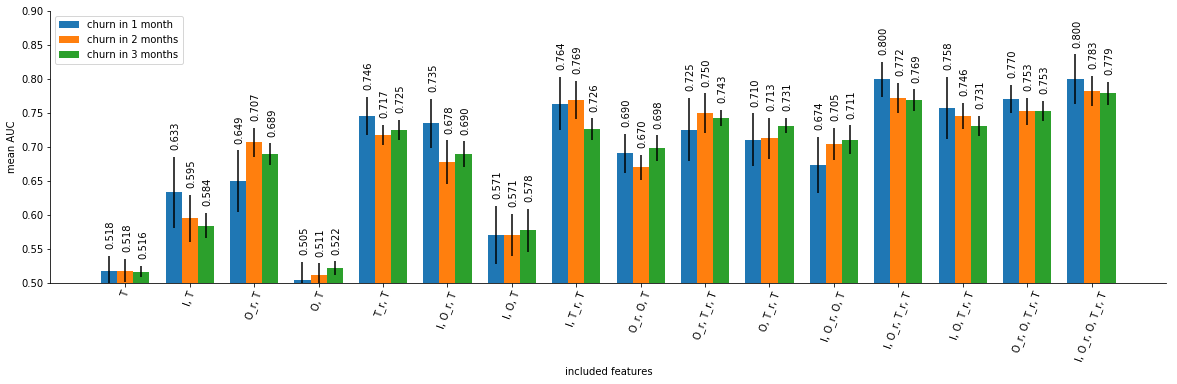

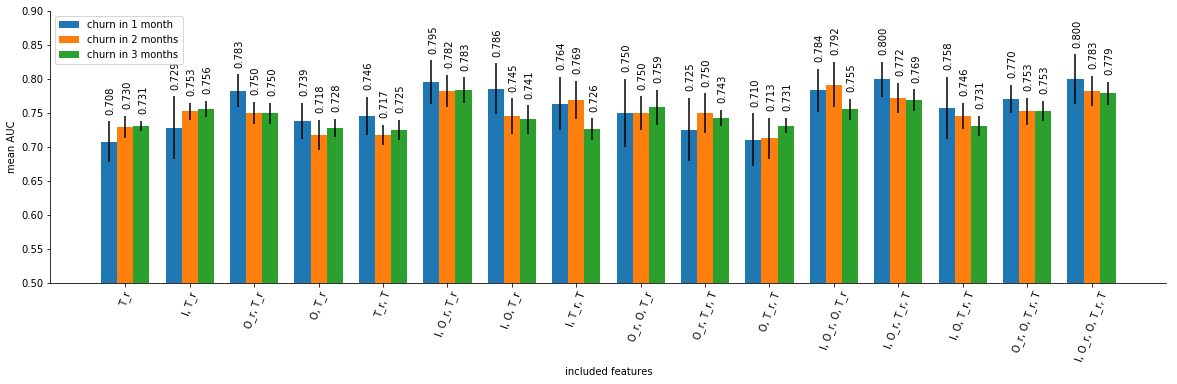

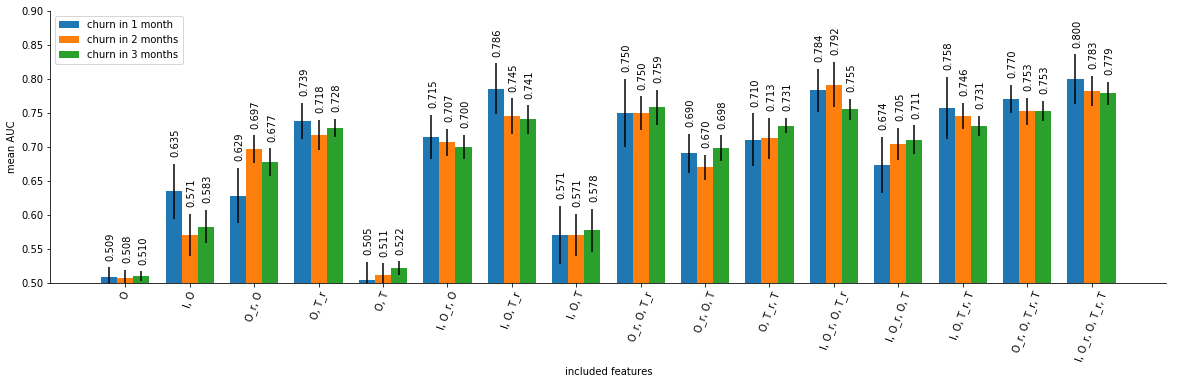

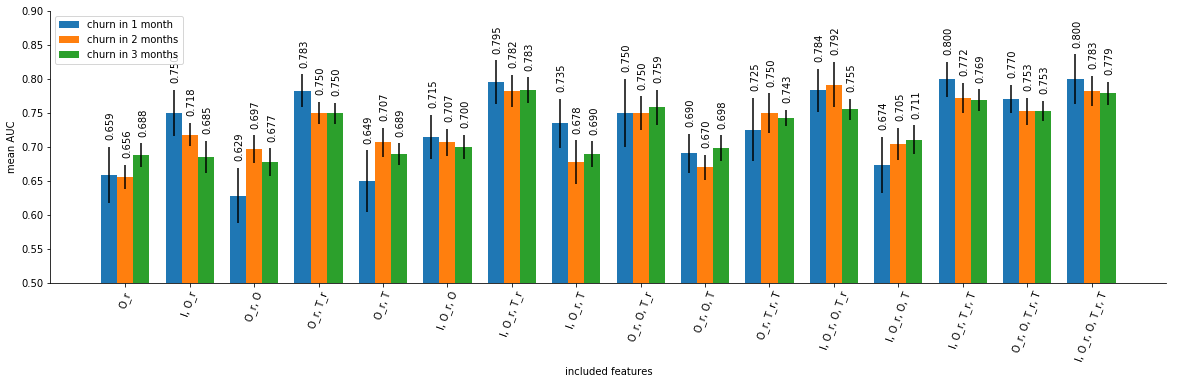

In [22]:
matrix = MATRIX

for x in [(3,11),(4,5,8),(9,10,12),(6,7),(13,14)]:
    regex = str(x)
    small_MATRIX = matrix[matrix['Included features'].str.contains(regex)]
    
    title = "features contain "+D[x]
    
    plt.close()
    fig, ax = plt.subplots(figsize=(20,5))
    features=[]
    for column in list(small_MATRIX.columns):
        if column == "Included features":
            for row in small_MATRIX[column]:
                row = ast.literal_eval(row)
                group = []
                for r in row:
                    group.append(D[r])
                features.append(group)
        if column!= "Included features":
            col_index = list(small_MATRIX.columns).index(column)
            means = []
            stds = []
            width = 0.25
            for row in small_MATRIX[column]:
                N = len(small_MATRIX[column])
                ind = np.arange(N)
                means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
                stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
            ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
            for i, v in enumerate(means):
                ax.text(i+((col_index-1.9)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in features], rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
    #ax.set_title(title)
    plt.savefig(os.path.join(path_out,"%s_balanced.png" %D[x]),bbox_inches='tight')
    plt.show()

linear balanced

C:\Users\sternheimam\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


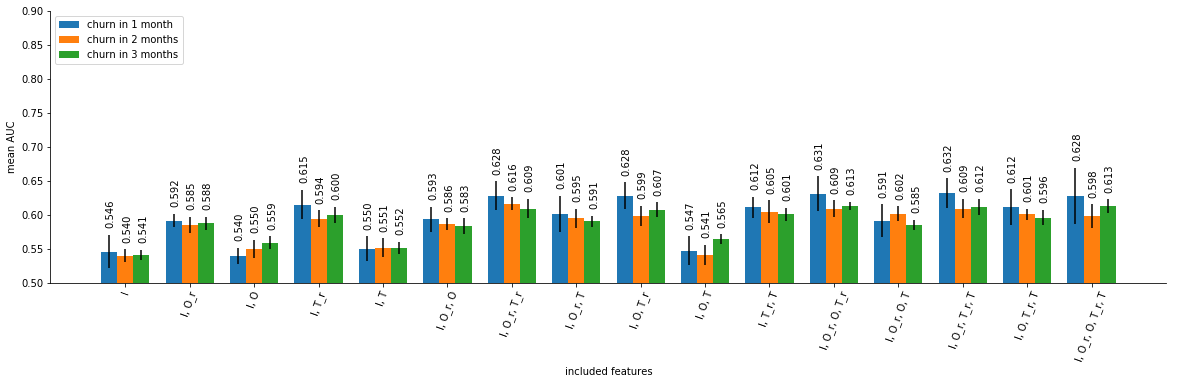

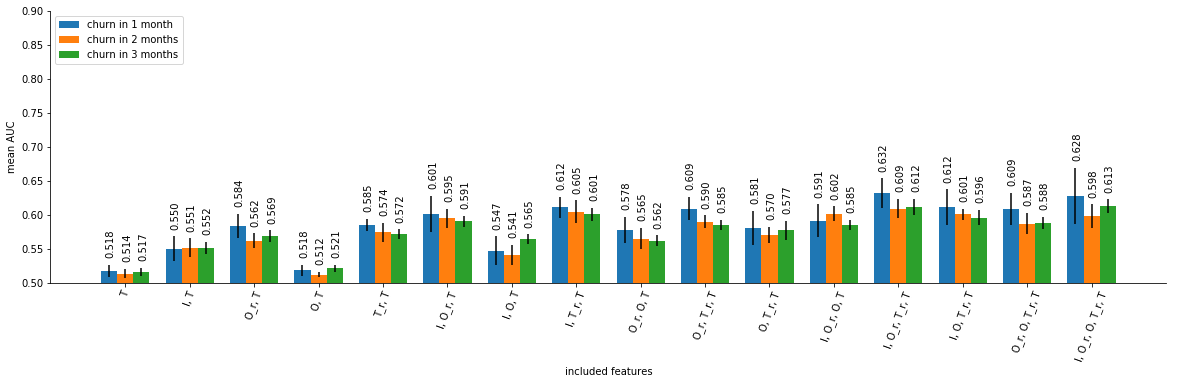

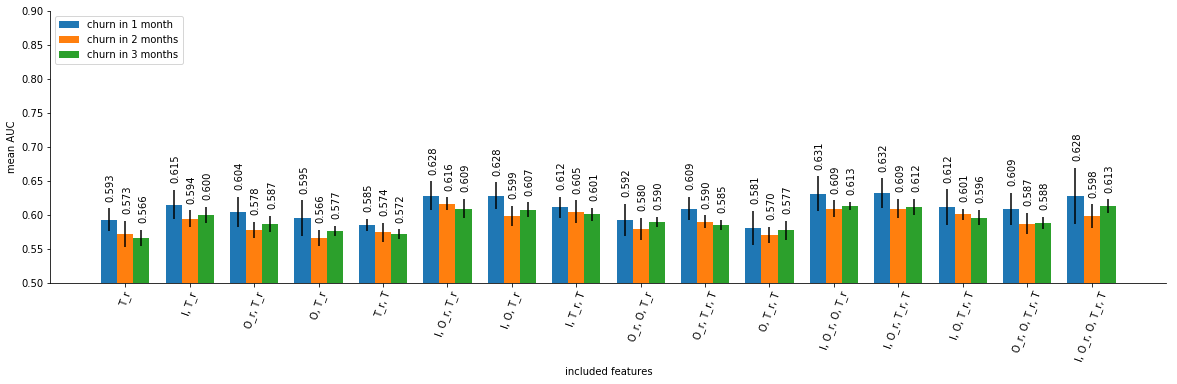

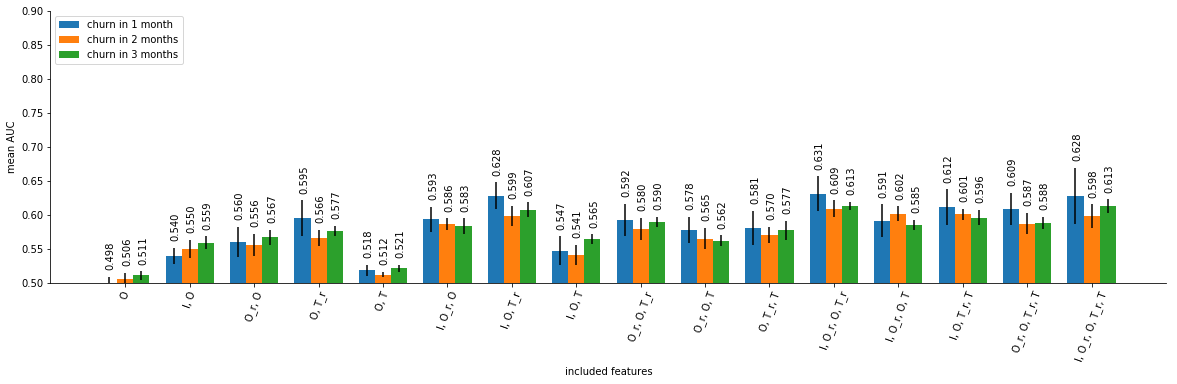

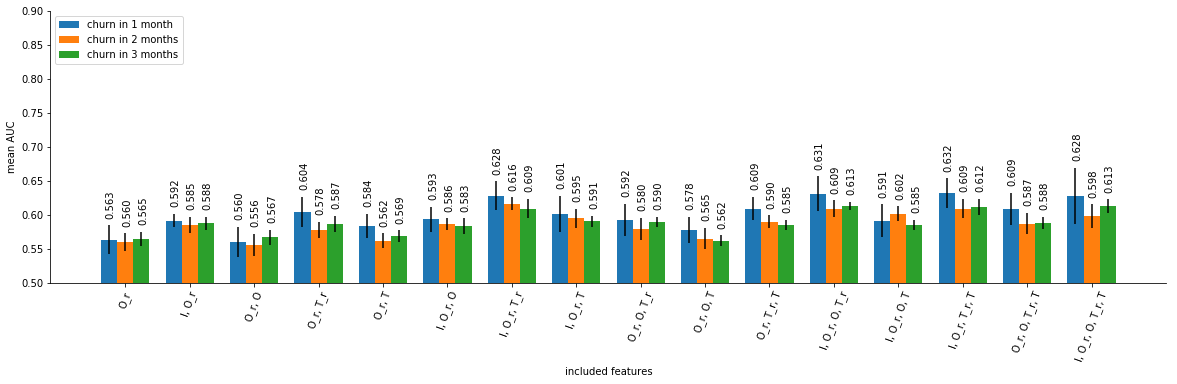

In [23]:
matrix = BASIX

for x in [(3,11),(4,5,8),(9,10,12),(6,7),(13,14)]:
    regex = str(x)
    small_MATRIX = matrix[matrix['Included features'].str.contains(regex)]
    
    title = "features contain "+D[x]
    
    plt.close()
    fig, ax = plt.subplots(figsize=(20,5))
    features=[]
    for column in list(small_MATRIX.columns):
        if column == "Included features":
            for row in small_MATRIX[column]:
                row = ast.literal_eval(row)
                group = []
                for r in row:
                    group.append(D[r])
                features.append(group)
        if column!= "Included features":
            col_index = list(small_MATRIX.columns).index(column)
            means = []
            stds = []
            width = 0.25
            for row in small_MATRIX[column]:
                N = len(small_MATRIX[column])
                ind = np.arange(N)
                means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
                stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
            ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
            for i, v in enumerate(means):
                ax.text(i+((col_index-1.9)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in features], rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
    #ax.set_title(title)
    plt.savefig(os.path.join(path_out,"%s_linear.png" %D[x]),bbox_inches='tight')
    plt.show()

# making a nice overview of relevant information

In [145]:
matrix = BASIX

In [148]:
new_matrix = pd.DataFrame()
for column in list(matrix.columns):
    churnvalues = []

    means = []
    stds = []
    if column == "Included features":
        for row in matrix[column]:
            churnvalues.append(row)    
    if column!= "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            means.append(np.mean(row['AUC_scores']))
            stds.append(np.std(row['AUC_scores']))
        for i in range(len(matrix)):
            churnvalues.append(r"%.3f $\pm$ %.3f" %(means[i],stds[i]))
    new_matrix[column]=churnvalues

In [157]:

new_matrix

,Churn in 1 months,Churn in 2 months,Churn in 3 months,Values
0,0.546 $\pm$ 0.024,0.540 $\pm$ 0.010,0.541 $\pm$ 0.008,AUC
1,0.563 $\pm$ 0.021,0.560 $\pm$ 0.013,0.565 $\pm$ 0.011,AUC
2,0.498 $\pm$ 0.011,0.506 $\pm$ 0.009,0.511 $\pm$ 0.006,AUC
3,0.593 $\pm$ 0.017,0.573 $\pm$ 0.019,0.566 $\pm$ 0.011,AUC
4,0.518 $\pm$ 0.009,0.514 $\pm$ 0.007,0.517 $\pm$ 0.006,AUC
5,0.592 $\pm$ 0.010,0.585 $\pm$ 0.012,0.588 $\pm$ 0.009,AUC
6,0.540 $\pm$ 0.012,0.550 $\pm$ 0.013,0.559 $\pm$ 0.009,AUC
7,0.615 $\pm$ 0.022,0.594 $\pm$ 0.013,0.600 $\pm$ 0.012,AUC
8,0.550 $\pm$ 0.018,0.551 $\pm$ 0.014,0.552 $\pm$ 0.009,AUC
9,0.560 $\pm$ 0.022,0.556 $\pm$ 0.017,0.567 $\pm$ 0.011,AUC


In [158]:
new_matrix.to_csv("shortbasix.csv", sep="&",index=False)

# significance of differences between AUC scores 

In [189]:
matrix = MATRIX

In [25]:
def plot_significance_matrix(dataframe,column):
    plt.close()
    plt.figure(figsize=(20,20))
    mask = np.zeros_like(dataframe, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    if column == "Churn in 1 months":
        color = "Blues_r"
    elif column == "Churn in 2 months":
        color = "Oranges_r"
    else:
        color = "Greens_r"
    cmap = sbn.color_palette(color)
    sbn.heatmap(dataframe, mask=mask, cmap=cmap,square=True,cbar_kws = {"shrink":.5},vmin=0.0,vmax=0.06,annot=True,fmt='.3f')
    #plt.title(column)
    plt.savefig(os.path.join(path_out,"significance%s.png" %column),bbox_inches='tight')
    plt.show()

In [26]:
def non_normal(distribution,alpha = 0.05):
    _,p = stats.normaltest(distribution)
    return True if p<alpha else False

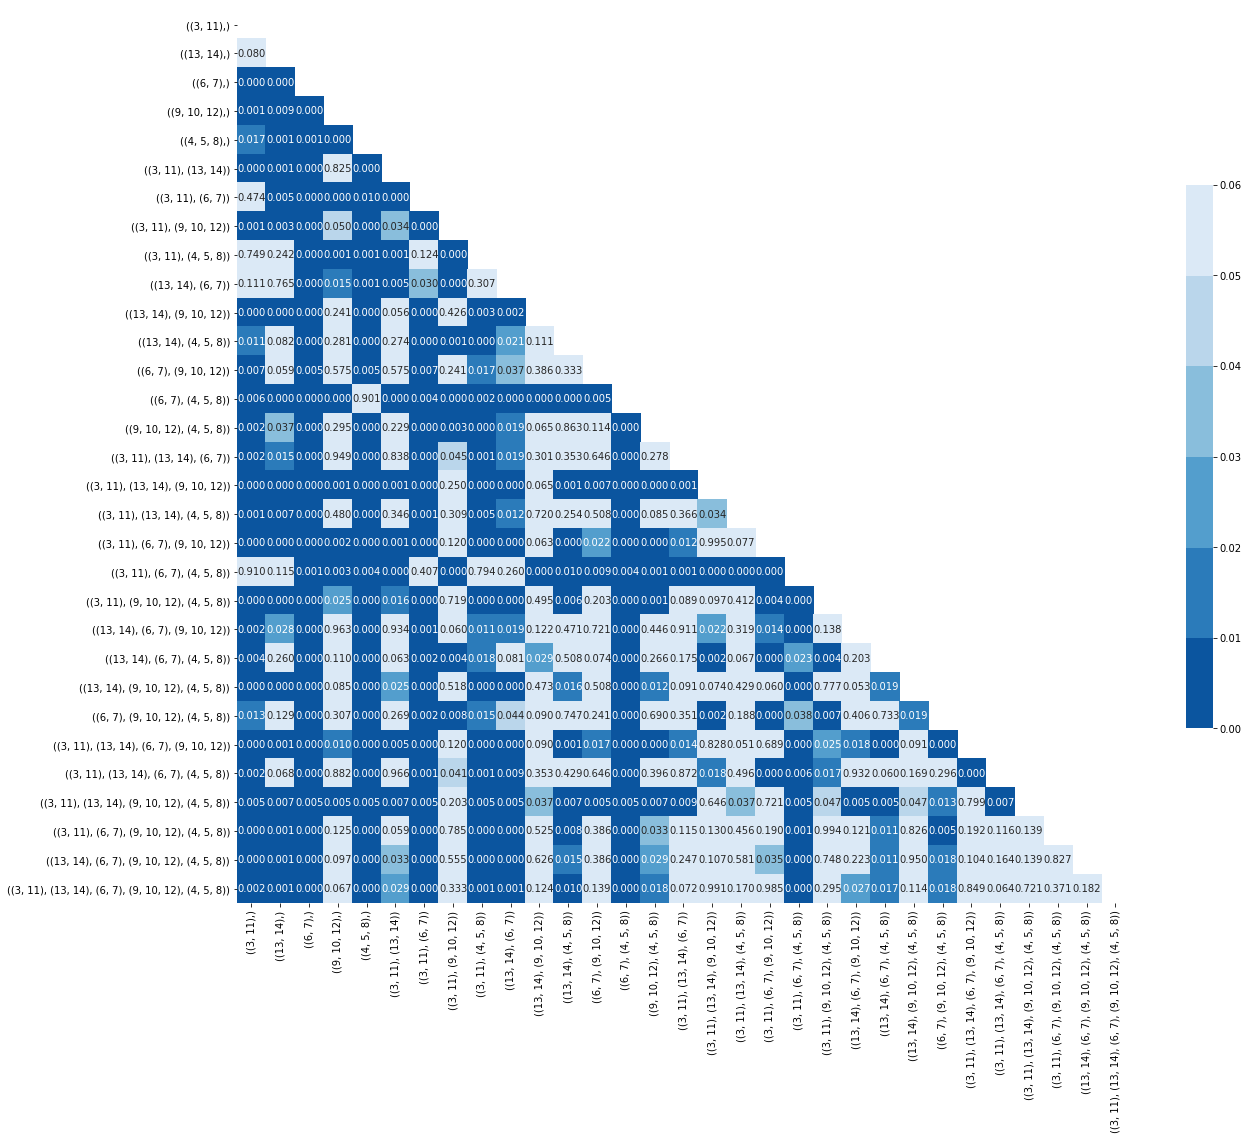

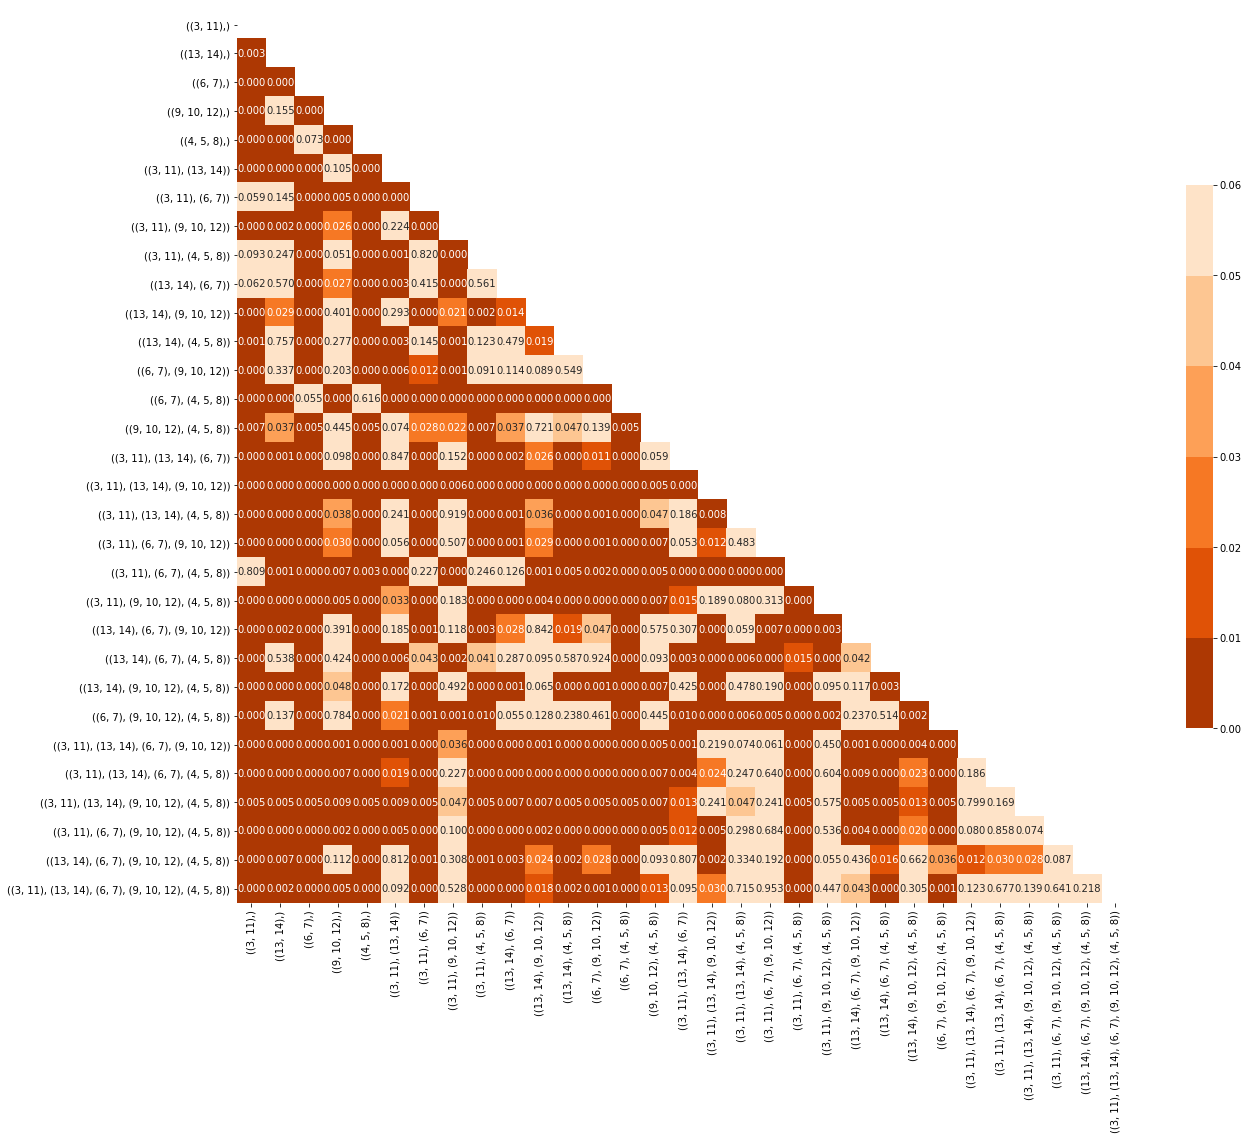

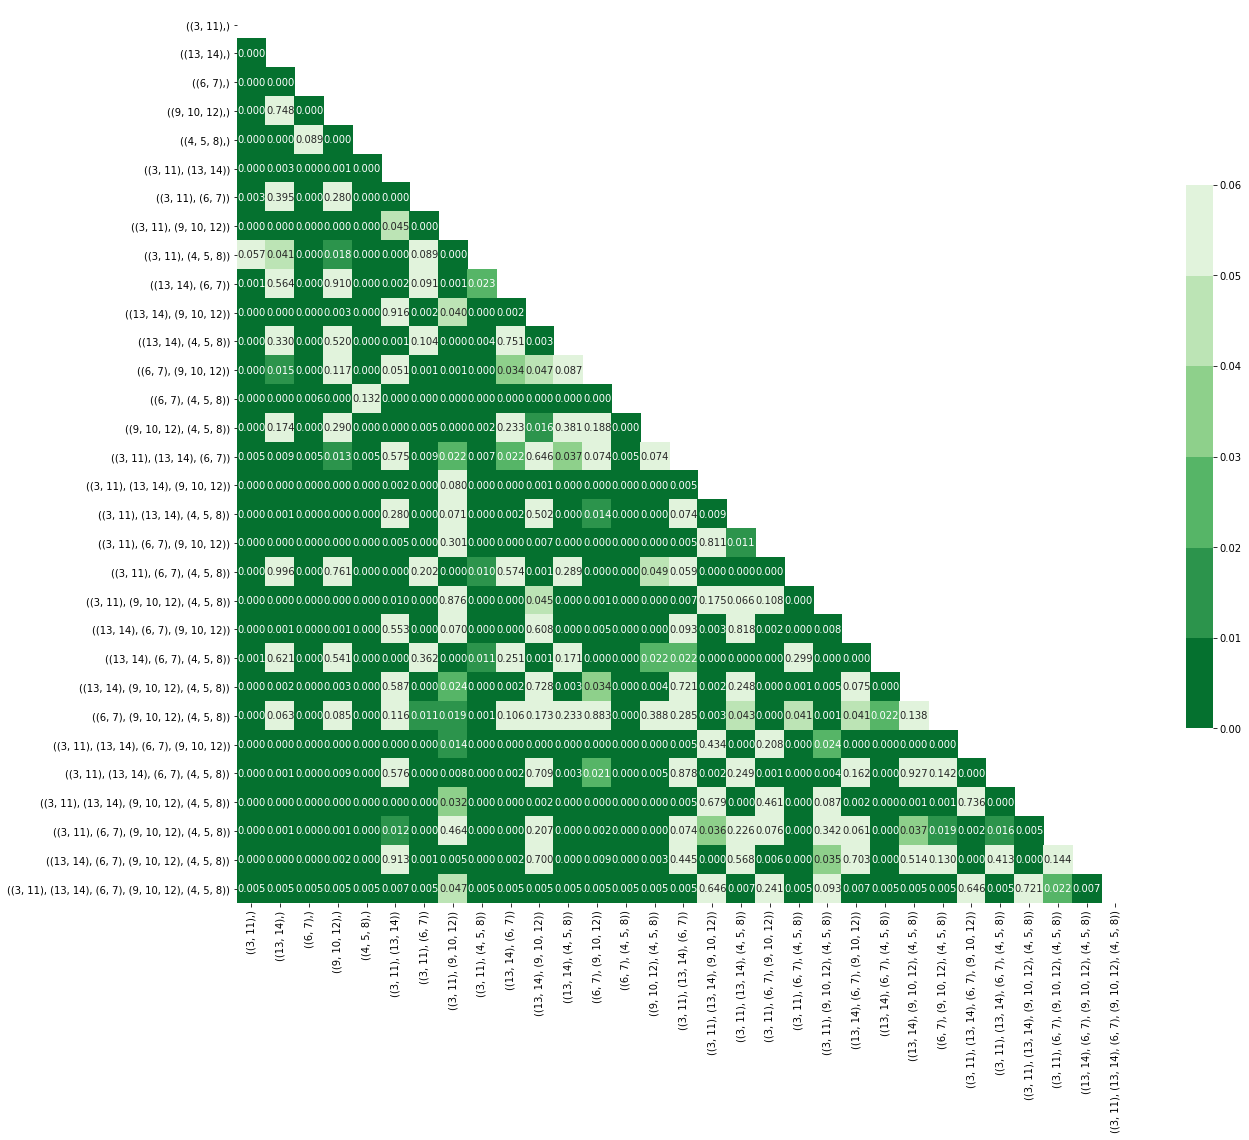

In [29]:
significance_matrix = pd.DataFrame()
churnvalues = []
for column in list(matrix.columns):
    scores = []
    if column == "Included features":
        for row in matrix[column]:
            churnvalues.append(row)
    if column != "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            scores.append(row['AUC_scores'])
        for t1 in scores:
            c = []
            for t2 in scores:
                r = []
                # als een van de twee nonnormal is, dan gaan we wilcoxon doen. anders doe je t-test.
                if non_normal(t1) or non_normal(t2):
                    _,r = stats.wilcoxon(t1,t2)
                else:
                    _,r = stats.ttest_rel(t1, t2)
                c.append(r)
            significance_matrix[churnvalues[scores.index(t1)]]=c
        D = dict()
        for i,v in enumerate(list(significance_matrix.columns)):
            D[i] = v
        significance_matrix.rename(D,inplace=True)
        plot_significance_matrix(significance_matrix,column)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
predictor = LinearRegression()

In [ ]:
predictor.fit(X)